In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (10, 10)

In [47]:
def read_file(filename):
    bandwidthCoalesced = []
    bandwidthOffset = []
    offset = []

    with open(filename) as file:
        for line in file:
            if line[0:9] == 'Coalesced':
                bois = re.search(r'bw=\s*(.+?)GB/s', line)
                bandwidthCoalesced.append(bois.group(1))
            elif line[0:6] == 'Offset':
                bois = re.search(r'Offset\(\s(.+?)\).*bw=\s*(.+?)GB/s', line)
                offset.append(bois.group(1))
                bandwidthOffset.append(bois.group(2))

    data = np.zeros((len(bandwidthCoalesced), 3))
    data[:, 0] = bandwidthCoalesced
    data[:, 1] = bandwidthOffset
    data[:, 2] = offset


    df = pd.DataFrame(data)
    df.columns = ['bandwidthCoalesced', 'bandwidthOffset', 'Offset']

    return df

Text(0.5, 1.0, 'Bandwidth for Coalesced and Offset')

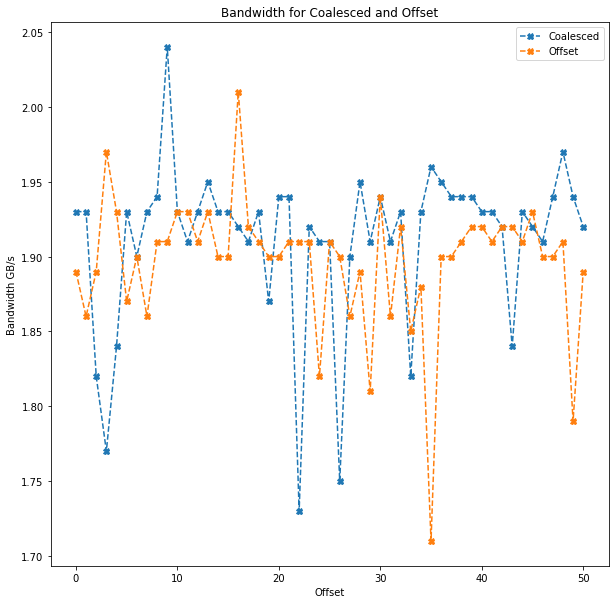

In [48]:
df = read_file('3_4_results.txt')

plt.plot(df['Offset'], df['bandwidthCoalesced'], label='Coalesced', linestyle='--', marker='X')
plt.plot(df['Offset'], df['bandwidthOffset'], label='Offset', linestyle='--', marker='X')
plt.legend()
plt.ylabel('Bandwidth GB/s')
plt.xlabel('Offset')
plt.title('Bandwidth for Coalesced and Offset')